# Clusters Kmeans y DBscan Run
- Preparación de la data
- OrdinalEncoder
- StandardScaler
- Seleccion y extracción de de caracteriticas por correlación
- PCA
- Métodos Hallar # Clusters 
 - Kmeans
 - DBscan

In [1]:
import numpy as np
import pandas as pd
from sklearn import utils

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# scikit-learn==1.1.1
# from sinfo import sinfo
# sinfo()

# PREPARACION DE LA DATA

lectura de la data Bot-Iot

In [2]:
dfs = []
for i in range(2):
    path = 'ids_tes_{}.csv'  # There are 4 input csv files
    #dfs.append(pd.read_csv(path.format(i), usecols=features_to_keep, sep='\t',decimal='.',low_memory=False))
    dfs.append(pd.read_csv(path.format(i), sep=',',decimal='.',low_memory=False))
df = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df
df =utils.shuffle(df, random_state=64)
df

,Unnamed: 0,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label,second,src,dst
7320,3310,143,0.272381,0.272381,0.241217,0.241217,0.238647,10868,0.224992,0.224992,0,0,143,0,1,97.0,14.0,11.0
3131,396,29,0.216418,0.216418,0.426052,0.426052,0.314003,3074,0.263569,0.263569,0,0,0,106,0,118.0,11.0,0.0
936,1742,156,1111.000000,819.000000,2122.000000,1136.000000,2080.000000,9984,1490.000000,992.000000,0,156,0,79843,1,NaN,NaN,NaN
1370,1109,156,931.000000,768.000000,1833.000000,1018.000000,1684.000000,9984,1131.000000,928.000000,0,156,0,38035,1,NaN,NaN,NaN
3674,6012,30,0.127119,1.000000,0.119712,1.000000,0.119553,2910,0.161299,1.000000,30,0,0,0,0,230.0,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2234,30,763.000000,680.000000,1963.000000,982.000000,1470.000000,2910,1121.000000,866.000000,30,0,0,0,1,NaN,NaN,NaN
3238,7169,8,1.000000,1.000000,1.000000,1.000000,1.068001,816,1.000000,1.000000,8,0,0,0,0,118.0,3.0,12.0
6263,1701,3,0.026786,0.026786,0.001913,0.001913,0.001999,228,0.026786,0.026786,0,0,3,0,1,121.0,37.0,35.0
5094,8488,20,0.104167,0.104167,0.016832,0.016832,0.007996,1520,0.093240,0.093240,0,0,20,0,1,298.0,32.0,37.0


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df

,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label,second,src,dst
7320,143,0.272381,0.272381,0.241217,0.241217,0.238647,10868,0.224992,0.224992,0,0,143,0,1,97.0,14.0,11.0
3131,29,0.216418,0.216418,0.426052,0.426052,0.314003,3074,0.263569,0.263569,0,0,0,106,0,118.0,11.0,0.0
936,156,1111.000000,819.000000,2122.000000,1136.000000,2080.000000,9984,1490.000000,992.000000,0,156,0,79843,1,NaN,NaN,NaN
1370,156,931.000000,768.000000,1833.000000,1018.000000,1684.000000,9984,1131.000000,928.000000,0,156,0,38035,1,NaN,NaN,NaN
3674,30,0.127119,1.000000,0.119712,1.000000,0.119553,2910,0.161299,1.000000,30,0,0,0,0,230.0,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,30,763.000000,680.000000,1963.000000,982.000000,1470.000000,2910,1121.000000,866.000000,30,0,0,0,1,NaN,NaN,NaN
3238,8,1.000000,1.000000,1.000000,1.000000,1.068001,816,1.000000,1.000000,8,0,0,0,0,118.0,3.0,12.0
6263,3,0.026786,0.026786,0.001913,0.001913,0.001999,228,0.026786,0.026786,0,0,3,0,1,121.0,37.0,35.0
5094,20,0.104167,0.104167,0.016832,0.016832,0.007996,1520,0.093240,0.093240,0,0,20,0,1,298.0,32.0,37.0


In [5]:
df['label'].value_counts()

1    7999
0    5471
Name: label, dtype: int64

In [6]:
df = df.drop_duplicates()
df.label.value_counts()

1    7987
0    5434
Name: label, dtype: int64

In [7]:
df.columns
# NÚMERO DE COLUMNAS INICIALES
print(len(df.columns))

17


In [8]:
X = df.drop(['second','src', 'dst','label'],axis=1)
X

,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg
7320,143,0.272381,0.272381,0.241217,0.241217,0.238647,10868,0.224992,0.224992,0,0,143,0
3131,29,0.216418,0.216418,0.426052,0.426052,0.314003,3074,0.263569,0.263569,0,0,0,106
936,156,1111.000000,819.000000,2122.000000,1136.000000,2080.000000,9984,1490.000000,992.000000,0,156,0,79843
1370,156,931.000000,768.000000,1833.000000,1018.000000,1684.000000,9984,1131.000000,928.000000,0,156,0,38035
3674,30,0.127119,1.000000,0.119712,1.000000,0.119553,2910,0.161299,1.000000,30,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,30,763.000000,680.000000,1963.000000,982.000000,1470.000000,2910,1121.000000,866.000000,30,0,0,0
3238,8,1.000000,1.000000,1.000000,1.000000,1.068001,816,1.000000,1.000000,8,0,0,0
6263,3,0.026786,0.026786,0.001913,0.001913,0.001999,228,0.026786,0.026786,0,0,3,0
5094,20,0.104167,0.104167,0.016832,0.016832,0.007996,1520,0.093240,0.093240,0,0,20,0


In [9]:
X.isna().sum().sort_values()

packetcount            0
src_ratio              0
dst_ratio              0
src_duration_ratio     0
dst_duration_ratio     0
TotalPacketDuration    0
TotalPacketLenght      0
src_packet_ratio       0
dst_packet_ratio       0
DioCount               0
DisCount               0
DaoCount               0
OtherMsg               0
dtype: int64

# OrdinalEncoder
codificacion activa canvertir categoricos en datos continuos

# StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit(X).transform(X)
#X_scaled = MinMaxScaler().fit(X).transform(X)
# print(X_scaled)
print("Longitud del conjunto de datos:", X_scaled.shape)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled

Longitud del conjunto de datos: (13421, 13)


,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg
7320,1.825793,-0.469220,-0.497147,-0.458028,-0.495446,-0.433054,1.596584,-0.468117,-0.496935,-0.566283,-0.292981,4.734668,-0.283848
3131,-0.318049,-0.469387,-0.497336,-0.457764,-0.494994,-0.432927,-0.184015,-0.468031,-0.496827,-0.566283,-0.292981,-0.389477,-0.275667
936,2.070266,2.840573,2.280183,2.575247,2.284349,3.068975,1.394627,2.838046,2.273291,-0.566283,3.392981,-0.389477,5.878115
1370,2.070266,2.304201,2.107178,2.162091,1.995541,2.402166,1.394627,2.041340,2.094526,-0.566283,3.392981,-0.389477,2.651541
3674,-0.299244,-0.469653,-0.494678,-0.458202,-0.493589,-0.433254,-0.221482,-0.468258,-0.494770,1.323001,-0.292981,-0.389477,-0.283848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,-0.299244,1.803588,1.808660,2.347940,1.907430,2.041820,-0.221482,2.019148,1.921348,1.323001,-0.292981,-0.389477,-0.283848
3238,-0.712968,-0.467052,-0.494678,-0.456943,-0.493589,-0.431657,-0.699872,-0.466397,-0.494770,-0.062474,-0.292981,-0.389477,-0.283848
6263,-0.806996,-0.469952,-0.497980,-0.458370,-0.496032,-0.433452,-0.834205,-0.468557,-0.497489,-0.566283,-0.292981,-0.281977,-0.283848
5094,-0.487300,-0.469722,-0.497717,-0.458349,-0.495995,-0.433442,-0.539038,-0.468409,-0.497303,-0.566283,-0.292981,0.327187,-0.283848


# Seleccion y extracción de de caracteriticas

In [11]:
# pd.options.display.max_rows = 1000
# pd.options.display.max_columns = 1000

In [12]:
pd.options.display.max_columns = X.shape[0]

# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = X_scaled.corr().abs()
corr_matrix.head()
corr_matrix

,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg
packetcount,1.000000,0.175943,0.108462,0.162503,0.104478,0.222412,0.964283,0.172767,0.107393,0.094443,0.611261,0.268209,0.545426
src_ratio,0.175943,1.000000,0.877012,0.968068,0.868022,0.869083,0.100156,0.998314,0.875868,0.151296,0.324232,0.013217,0.266554
dst_ratio,0.108462,0.877012,1.000000,0.867559,0.992517,0.862805,0.049599,0.882364,0.999181,0.229025,0.252844,0.064873,0.205148
src_duration_ratio,0.162503,0.968068,0.867559,1.000000,0.872136,0.894978,0.091556,0.970927,0.868479,0.164639,0.306895,0.025518,0.250467
dst_duration_ratio,0.104478,0.868022,0.992517,0.872136,1.000000,0.868934,0.046645,0.874526,0.994102,0.236581,0.251844,0.075843,0.204463
TotalPacketDuration,0.222412,0.869083,0.862805,0.894978,0.868934,1.000000,0.145900,0.873180,0.863970,0.211870,0.360980,0.032432,0.298081
TotalPacketLenght,0.964283,0.100156,0.049599,0.091556,0.046645,0.145900,1.000000,0.099499,0.049645,0.027340,0.412263,0.212940,0.386119
src_packet_ratio,0.172767,0.998314,0.882364,0.970927,0.874526,0.873180,0.099499,1.000000,0.882355,0.166881,0.316272,0.016617,0.259411
dst_packet_ratio,0.107393,0.875868,0.999181,0.868479,0.994102,0.863970,0.049645,0.882355,1.000000,0.238204,0.250659,0.068836,0.203323
DioCount,0.094443,0.151296,0.229025,0.164639,0.236581,0.211870,0.027340,0.166881,0.238204,1.000000,0.165910,0.220327,0.160658


In [13]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg
packetcount,1.000000,0.175943,0.108462,0.162503,0.104478,0.222412,0.964283,0.172767,0.107393,0.094443,0.611261,0.268209,0.545426
src_ratio,0.175943,1.000000,0.877012,0.968068,0.868022,0.869083,0.100156,0.998314,0.875868,0.151296,0.324232,0.013217,0.266554
dst_ratio,0.108462,0.877012,1.000000,0.867559,0.992517,0.862805,0.049599,0.882364,0.999181,0.229025,0.252844,0.064873,0.205148
src_duration_ratio,0.162503,0.968068,0.867559,1.000000,0.872136,0.894978,0.091556,0.970927,0.868479,0.164639,0.306895,0.025518,0.250467
dst_duration_ratio,0.104478,0.868022,0.992517,0.872136,1.000000,0.868934,0.046645,0.874526,0.994102,0.236581,0.251844,0.075843,0.204463
TotalPacketDuration,0.222412,0.869083,0.862805,0.894978,0.868934,1.000000,0.145900,0.873180,0.863970,0.211870,0.360980,0.032432,0.298081
TotalPacketLenght,0.964283,0.100156,0.049599,0.091556,0.046645,0.145900,1.000000,0.099499,0.049645,0.027340,0.412263,0.212940,0.386119
src_packet_ratio,0.172767,0.998314,0.882364,0.970927,0.874526,0.873180,0.099499,1.000000,0.882355,0.166881,0.316272,0.016617,0.259411
dst_packet_ratio,0.107393,0.875868,0.999181,0.868479,0.994102,0.863970,0.049645,0.882355,1.000000,0.238204,0.250659,0.068836,0.203323
DioCount,0.094443,0.151296,0.229025,0.164639,0.236581,0.211870,0.027340,0.166881,0.238204,1.000000,0.165910,0.220327,0.160658


In [14]:
# Triángulo superior de correlaciones
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg
packetcount,NaN,0.175943,0.108462,0.162503,0.104478,0.222412,0.964283,0.172767,0.107393,0.094443,0.611261,0.268209,0.545426
src_ratio,NaN,NaN,0.877012,0.968068,0.868022,0.869083,0.100156,0.998314,0.875868,0.151296,0.324232,0.013217,0.266554
dst_ratio,NaN,NaN,NaN,0.867559,0.992517,0.862805,0.049599,0.882364,0.999181,0.229025,0.252844,0.064873,0.205148
src_duration_ratio,NaN,NaN,NaN,NaN,0.872136,0.894978,0.091556,0.970927,0.868479,0.164639,0.306895,0.025518,0.250467
dst_duration_ratio,NaN,NaN,NaN,NaN,NaN,0.868934,0.046645,0.874526,0.994102,0.236581,0.251844,0.075843,0.204463


In [15]:
# seleccion de caracteristicas
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
c = [column for column in upper.index if any(upper.loc[column,:] > threshold)]
# print(to_drop)
# print(c)

# Se obtiene el nombre de la columna e index de la matriz de 
# correlacion para tener una lista de correlacion
for i in c:
    if i not in to_drop:
#         print(i)
        to_drop.append(i)
print('correlacion para tener una lista de correlacion',to_drop)


# lista de variables correlacionadas entre si
gru=[]
for i in to_drop:
    r = corr_matrix.loc[:,i][corr_matrix.loc[:,i] > 0.9]
    print(r)
    lis=list(r.index.values)
    if len(gru) == 0:
        gru.append(lis)
    elif lis not in gru:
        gru.append(lis)
print('lista de variables correlacionadas entre si',gru)
# seleccion entre los grupos la caracterisca que representa a da grupo
# con una media mayor
sel_car=[]        
for i in gru:
    r = corr_matrix.loc[:,i][corr_matrix.loc[:,i[0]] > 0.9]
#     print(r)
#     print(r.mean().sort_values())
    sel_car.append(r.mean().sort_values().index[-1])
print('caracterisca que representa a cada grupo con una media mayor',sel_car)
#     lista final de las caracteristicas a eliminar
for i,v in enumerate(sel_car):
    if v in to_drop:
#         print(v)
        to_drop.remove(v)
    

to_drop

correlacion para tener una lista de correlacion ['src_duration_ratio', 'dst_duration_ratio', 'TotalPacketLenght', 'src_packet_ratio', 'dst_packet_ratio', 'packetcount', 'src_ratio', 'dst_ratio']
src_ratio             0.968068
src_duration_ratio    1.000000
src_packet_ratio      0.970927
Name: src_duration_ratio, dtype: float64
dst_ratio             0.992517
dst_duration_ratio    1.000000
dst_packet_ratio      0.994102
Name: dst_duration_ratio, dtype: float64
packetcount          0.964283
TotalPacketLenght    1.000000
Name: TotalPacketLenght, dtype: float64
src_ratio             0.998314
src_duration_ratio    0.970927
src_packet_ratio      1.000000
Name: src_packet_ratio, dtype: float64
dst_ratio             0.999181
dst_duration_ratio    0.994102
dst_packet_ratio      1.000000
Name: dst_packet_ratio, dtype: float64
packetcount          1.000000
TotalPacketLenght    0.964283
Name: packetcount, dtype: float64
src_ratio             1.000000
src_duration_ratio    0.968068
src_packet_ratio 

['src_duration_ratio',
 'dst_duration_ratio',
 'packetcount',
 'src_ratio',
 'dst_ratio']

In [16]:
# #to_drop + eliminacion caracteristicas con el mismo valor 0
to_drop=to_drop+ corr_matrix[corr_matrix.isnull().sum() == len(corr_matrix)].index.to_list()
to_drop

['src_duration_ratio',
 'dst_duration_ratio',
 'packetcount',
 'src_ratio',
 'dst_ratio']

In [17]:
#Seleccione las columnas con correlaciones superiores al umbral Ejercicio #1
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
print(to_drop)
X_scaled1 = X_scaled.drop(to_drop,axis=1)
X_scaled1.head(10)

#### 17/08/2022 Reunión
# que variables representan las varaibles que se quitan?
# realizar la comparacion de los datos de la correlacion desde la matriz de correlacion?

There are 5 columns to remove.
['src_duration_ratio', 'dst_duration_ratio', 'TotalPacketLenght', 'src_packet_ratio', 'dst_packet_ratio']


,packetcount,src_ratio,dst_ratio,TotalPacketDuration,DioCount,DisCount,DaoCount,OtherMsg
7320,1.825793,-0.469220,-0.497147,-0.433054,-0.566283,-0.292981,4.734668,-0.283848
3131,-0.318049,-0.469387,-0.497336,-0.432927,-0.566283,-0.292981,-0.389477,-0.275667
936,2.070266,2.840573,2.280183,3.068975,-0.566283,3.392981,-0.389477,5.878115
1370,2.070266,2.304201,2.107178,2.402166,-0.566283,3.392981,-0.389477,2.651541
3674,-0.299244,-0.469653,-0.494678,-0.433254,1.323001,-0.292981,-0.389477,-0.283848
4651,-0.449689,-0.468649,-0.497404,-0.433296,0.819192,-0.292981,-0.389477,-0.283848
8156,-0.468494,-0.469579,-0.494678,-0.433373,-0.566283,-0.292981,-0.389477,-0.034569
246,2.070266,2.891230,2.280183,3.331658,-0.566283,3.392981,-0.389477,1.687613
1166,-0.299244,2.104552,2.280183,1.960995,1.323001,-0.292981,-0.389477,-0.283848
4509,-0.600134,-0.468045,-0.494678,-0.433368,0.315383,-0.292981,-0.389477,-0.283848


In [18]:
#Buscar valores nulos
X_scaled1.isna().sum().sort_values()

packetcount            0
src_ratio              0
dst_ratio              0
TotalPacketDuration    0
DioCount               0
DisCount               0
DaoCount               0
OtherMsg               0
dtype: int64

In [19]:
# conocer el valor promedio de las variables, se ven las diferencias en las medias de las varibles(csop de port_src y dst)  unas másm que otras
X_scaled1.mean(axis=0)

packetcount            6.247228e-17
src_ratio             -6.670769e-17
dst_ratio              2.117704e-18
TotalPacketDuration   -3.732454e-17
DioCount              -2.594188e-17
DisCount               1.641221e-17
DaoCount               6.591355e-17
OtherMsg               4.235409e-18
dtype: float64

In [20]:
# Dispersion de las variables: la  varianza entre variables es distinta)
# se necesita normalizar las varibales que tengan media cero y desviacion standar de uno antes de hacer PCA
X_scaled1.var(axis=0)

packetcount            1.000075
src_ratio              1.000075
dst_ratio              1.000075
TotalPacketDuration    1.000075
DioCount               1.000075
DisCount               1.000075
DaoCount               1.000075
OtherMsg               1.000075
dtype: float64

# PCA 

In [21]:
# PCA 

from sklearn.decomposition import PCA

#*Funcion de bucle identifica cantidad de cpa explica el 85% de la variación del dataset
for comp in range(2, X_scaled1.shape[1]):
    pca = PCA(n_components= comp)
    pca.fit(X_scaled1)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp)
Final_PCA.fit(X_scaled1)
cluster_df=Final_PCA.transform(X_scaled1)

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))
#con 6 components, we can explain 0.8847885302822108% (con 0.85%)
#con 2 comp explicacion de la variabilidad del 92% con mormalizado
# lo que se quita como queda representado

Using 4 components, we can explain 0.9109633467831966% of the variability in the original data.


In [22]:
comp_check

array([0.41609833, 0.24588291, 0.14761977, 0.10136234])

In [23]:
pd.DataFrame(pca.components_,columns=X_scaled1.columns,index = [f'PC-{i}' for i in range(final_comp)]).T

,PC-0,PC-1,PC-2,PC-3
packetcount,0.280592,0.436015,0.181865,0.467225
src_ratio,0.464770,-0.279023,0.153670,-0.162920
dst_ratio,0.444344,-0.345696,0.110296,-0.129119
TotalPacketDuration,0.476092,-0.264480,0.112548,-0.061954
DioCount,0.056542,-0.403054,-0.280711,0.827760
DisCount,0.387029,0.417526,-0.231620,-0.006951
DaoCount,-0.030577,0.150436,0.846829,0.221684
OtherMsg,0.356691,0.427984,-0.262511,-0.016385


In [24]:
#Visualizacion
cluster_df.shape
cluster_df = pd.DataFrame(cluster_df,index=X_scaled1.index)
cluster_df.head(10)

,0,1,2,3
7320,-0.524280,1.910088,4.467162,1.608062
3131,-0.966330,0.208067,-0.264185,-0.529625
936,7.765158,2.612197,-1.089885,-0.655044
1370,5.970642,1.617100,-0.419429,-0.451140
3674,-0.856247,-0.549476,-0.788745,1.042891
4651,-0.927711,-0.411337,-0.674832,0.555757
8156,-0.921667,0.244909,-0.354623,-0.604151
246,6.419047,0.735121,0.047515,-0.610909
1166,2.713041,-2.860229,0.182358,0.116879
4509,-0.996953,-0.274963,-0.560382,0.067986


In [25]:
#Vector con el porcentaje de influencia de la varianza explicada por cada componente, 
# de las 6 variables resultantes del conjunto de datos
explained_variance = pca.explained_variance_ratio_
explained_variance 

array([0.41609833, 0.24588291, 0.14761977, 0.10136234])

Los 2 componentes principales resultantes son los dos valores propios de los vectores propios con el valor más alto de los 24 originales del conjunto de datos. De ahí se obtuvieron los dos más altos para obtener las 2 dimensiones resultantes o componentes principales. El primero representa el 60.64%, el segundo el 31.39%.

# Métodos Hallar # Clusters 

## Metodos para K-Means y Dbscan

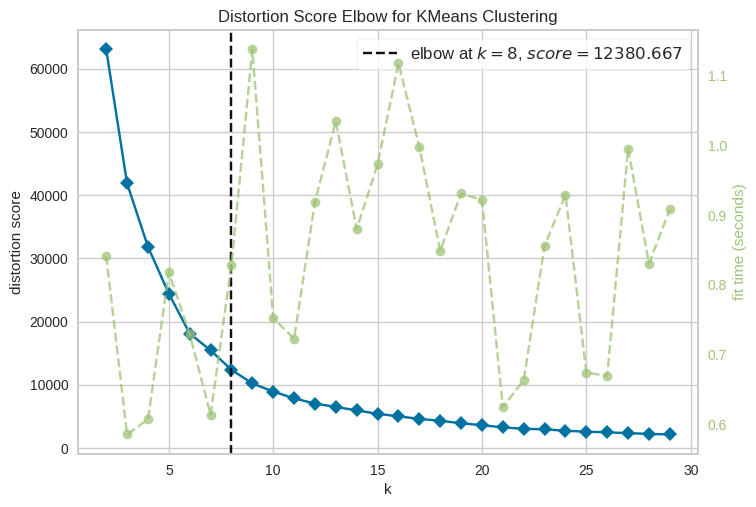

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Método del codo
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init='k-means++',max_iter=500,tol=0.0001)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

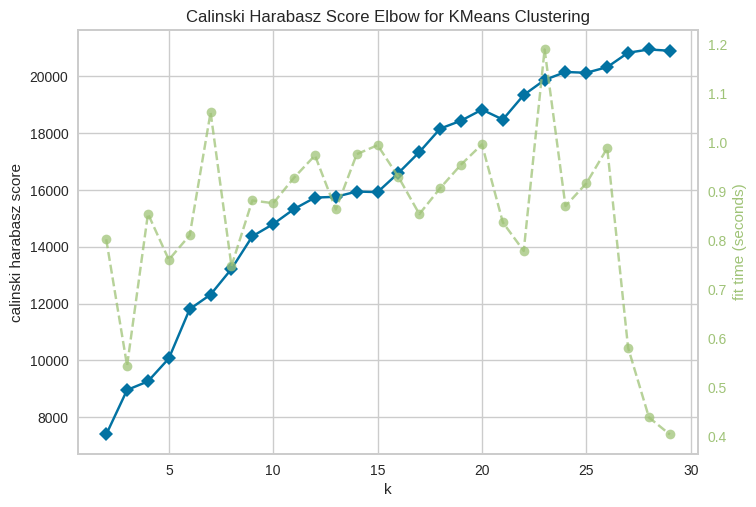

Optimal number of clusters based on calinski harabasz: [28]


In [27]:
# Índice de Calinski-Harabasz

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init='k-means++',max_iter=500,tol=0.0001)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski harabasz:', df4['centers'].tolist())

Optimal number of clusters based on DB score: [6]


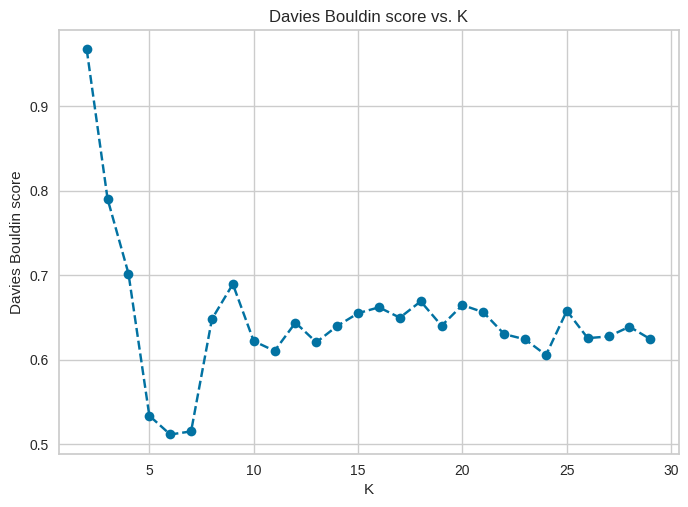

In [28]:
# Índice Davies-Bouldin

from sklearn.metrics import davies_bouldin_score 
import matplotlib.pyplot as plt

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center, init='k-means++',max_iter=500,tol=0.0001)

    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(cluster_df)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(cluster_df, model)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_kmeans_score(cluster_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

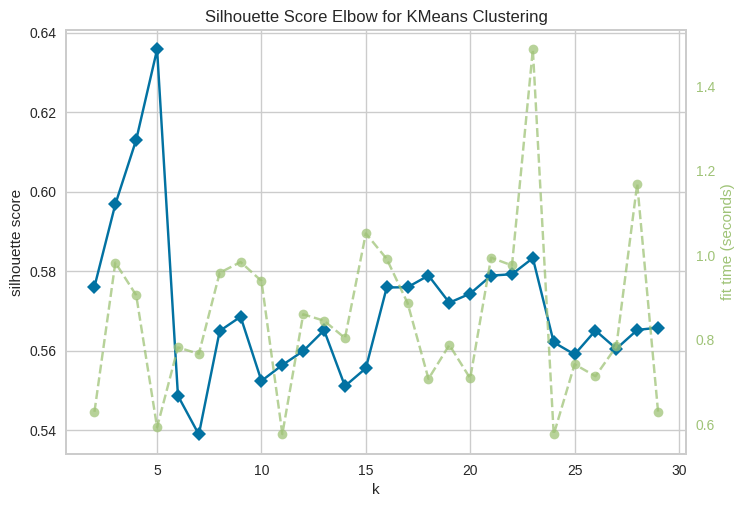

número óptimo de clústeres basado silhouette score: [5]
Coeficiente de silueta sacando los cluster..realizado. Tiempo gastado: 71.07797122001648 segundos


In [29]:
# Coeficiente de silueta
#gasto de 3 horas en visualizar
import time
time_start = time.time()

# Importar ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans( init='k-means++',max_iter=500,tol=0.0001)
# k es el rango de cantidad de clusters. 
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(cluster_df)        # Ajusta los datos al visualizador 
visualizer.show()        # Finaliza y renderiza la figura

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('número óptimo de clústeres basado silhouette score:', df4['centers'].tolist())
print('Coeficiente de silueta sacando los cluster..realizado. Tiempo gastado: {} segundos'.format(time.time()-time_start))

In [30]:
!pip install kneed

## DBSCAN

 eps= 0.05964017797389233


<Figure size 500x500 with 0 Axes>

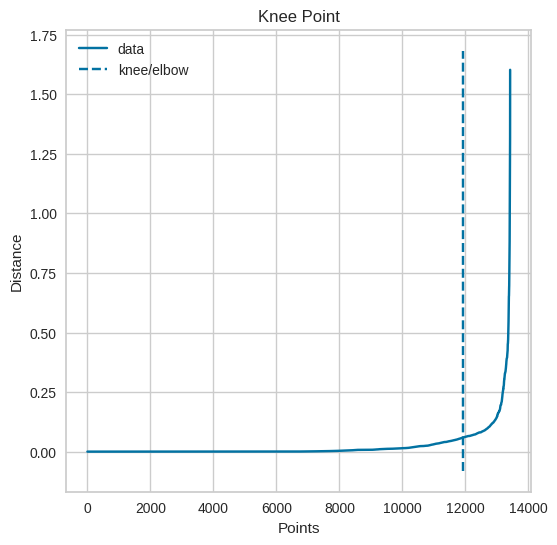

In [31]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=10)
neighbors = nearest_neighbors.fit(cluster_df)
distances, indices = neighbors.kneighbors(cluster_df)
distances = np.sort(distances[:,2], axis=0)

from kneed import KneeLocator
import matplotlib.pyplot as plt
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(f' eps= {distances[knee.knee]}')

 número óptimo de clústeres basado en silhouette score: [3]


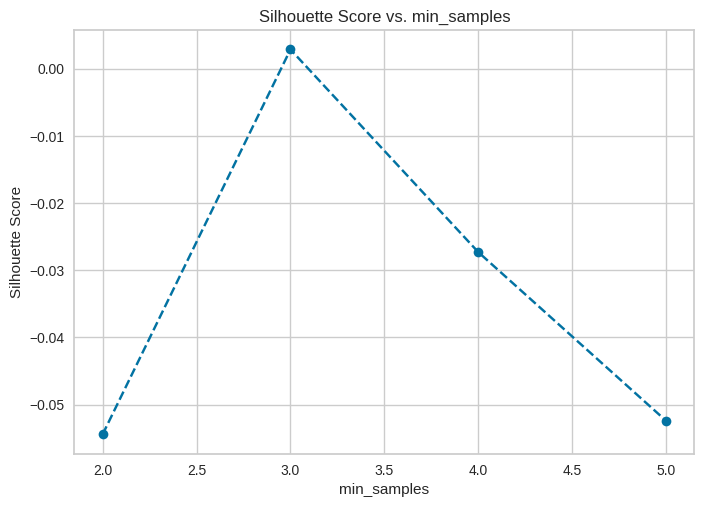

In [32]:
#  Silhouette Score for DBSCAN

from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    '''
    
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (th k value)
    OUTPUT:
        score - the Silhouette Score for DBSCAN
    '''
    #instantiate kmeans
    dbscan = DBSCAN(eps=  distances[knee.knee], min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(cluster_df)
    
    # Calculate Silhoutte Score

    score = silhouette_score(cluster_df, model.labels_, metric='euclidean')
    
    return score

scores = []
centers = list(range(2,6))

for center in centers:
    scores.append(get_dbscan_score(cluster_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print(' número óptimo de clústeres basado en silhouette score:', df4['min_samples'].tolist())

 número óptimo de clústeres basado en Calinski Harabasz score: [5]


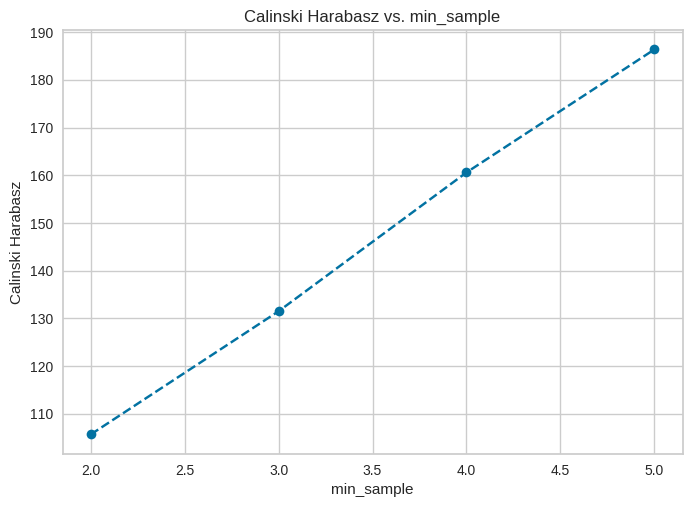

In [33]:
# Calinski Harabasz para DBSCAN
from sklearn.metrics import calinski_harabasz_score  
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    '''    
    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Calinski ´´ score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps= distances[knee.knee], min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(cluster_df)
    
    # Calculate Silhoutte Score
    score = calinski_harabasz_score(cluster_df, dbscan.labels_)    
    return score

scores = []
centers = list(range(2,6))

for center in centers:
    scores.append(get_dbscan_score(cluster_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_sample');
plt.ylabel('Calinski Harabasz');
plt.title('Calinski Harabasz vs. min_sample');

df3 = pd.DataFrame(centers,columns=['min_sample'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print(' número óptimo de clústeres basado en Calinski Harabasz score:', df4['min_sample'].tolist())

 número óptimo de clústeres basado en DB score: [5]


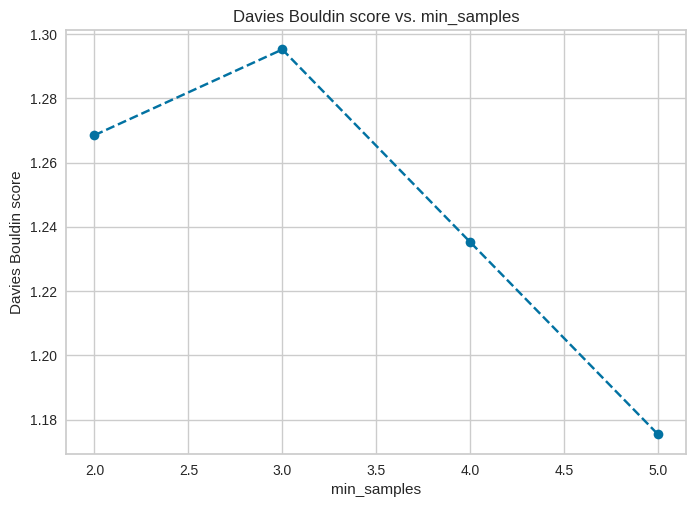

In [34]:
# Davies Bouldin score para DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score 

def get_dbscan_score(data, center):
    '''
    returns the dbscan score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps= distances[knee.knee], min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit_predict(cluster_df)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(cluster_df, model)
    
    return score

scores = []
centers = list(range(2,6))

for center in centers:
    scores.append(get_dbscan_score(cluster_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print(' número óptimo de clústeres basado en DB score:', df4['min_samples'].tolist())